In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
file_path = r"stesla.xlsx"
df = pd.read_excel(file_path, index_col = 'date', parse_dates = True)
close = df[['4. close']]
close

,4. close
date,
2020-05-05,768.21
2020-05-06,782.58
2020-05-07,780.04
2020-05-08,819.42
2020-05-11,811.29
...,...
2020-09-18,442.15
2020-09-21,449.39
2020-09-22,424.23


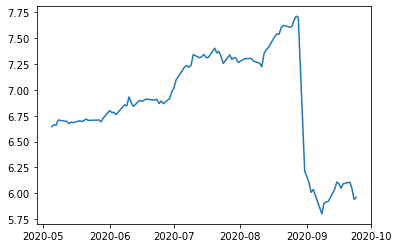

In [3]:
lnclose = np.log(close)
lnclose
plt.plot(lnclose)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

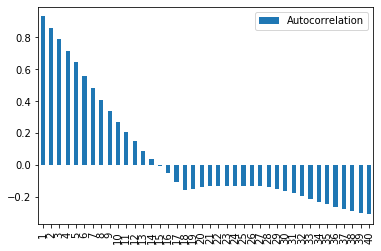

In [4]:
plt.figure(figsize = (60,10))
a = acf(lnclose)[1:100]
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

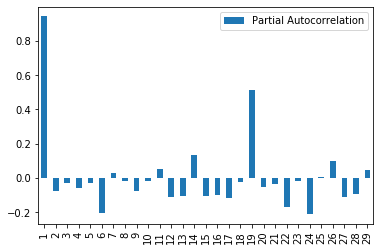

In [5]:
p = pacf(lnclose)[1:30]
test_df = pd.DataFrame([p]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

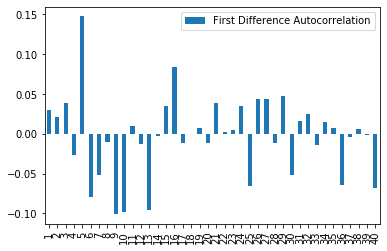

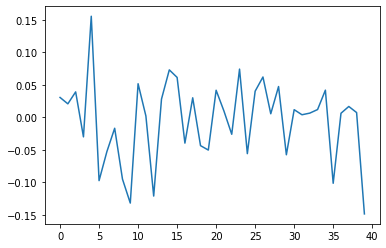

In [6]:
result = ts.adfuller(lnclose, 1)
result
lnclose_diff = lnclose-lnclose.shift()
diff = lnclose_diff.dropna()
a_diff = acf(diff)[1:100]
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)[1:100]
plt.figure()
plt.plot(p_diff)
plt.show()

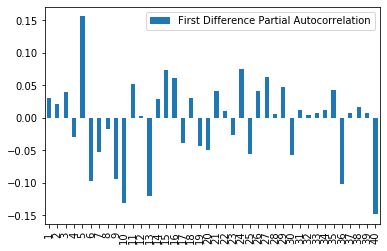

In [7]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

predicted=383.947374
predicted=380.104747
predicted=376.262121
predicted=372.419495
predicted=368.576869
predicted=364.734243
predicted=360.891617
predicted=357.048990
predicted=353.206364
predicted=349.363738


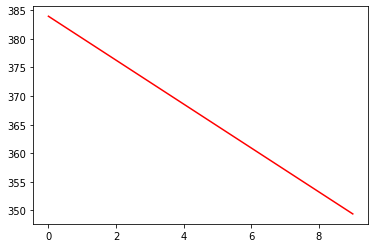

In [8]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=383.947374
predicted=380.104747
predicted=376.262121
predicted=372.419495
predicted=368.576869
predicted=364.734243
predicted=360.891617
predicted=357.048990
predicted=353.206364
predicted=349.363738


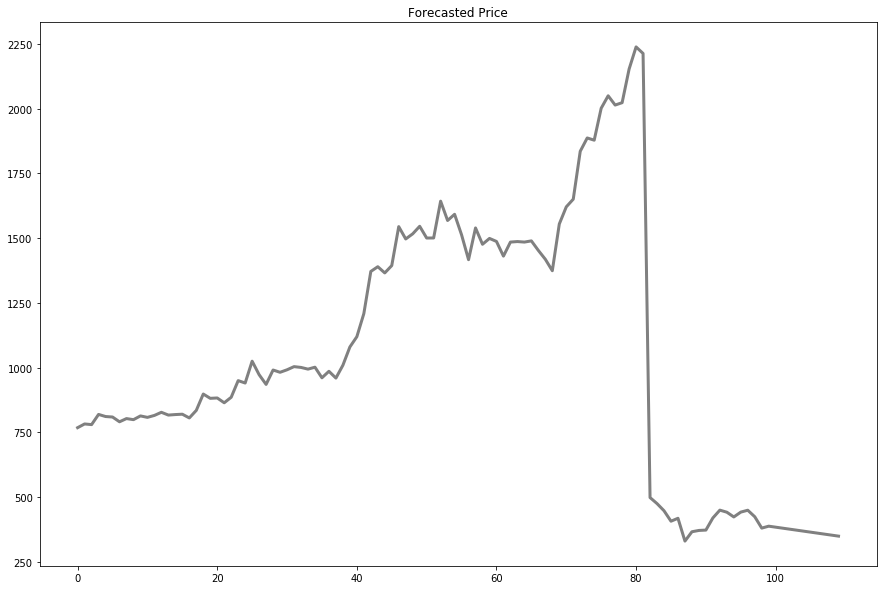

In [9]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'grey', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [10]:
opening = df[['1. open']]
opening

,1. open
date,
2020-05-05,789.79
2020-05-06,776.50
2020-05-07,777.21
2020-05-08,793.77
2020-05-11,790.51
...,...
2020-09-18,447.94
2020-09-21,453.13
2020-09-22,429.60


predicted=359.497071
predicted=355.194141
predicted=350.891212
predicted=346.588283
predicted=342.285354
predicted=337.982424
predicted=333.679495
predicted=329.376566
predicted=325.073636
predicted=320.770707


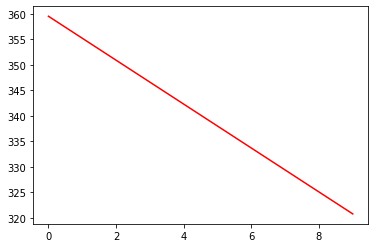

In [11]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=359.497071
predicted=355.194141
predicted=350.891212
predicted=346.588283
predicted=342.285354
predicted=337.982424
predicted=333.679495
predicted=329.376566
predicted=325.073636
predicted=320.770707


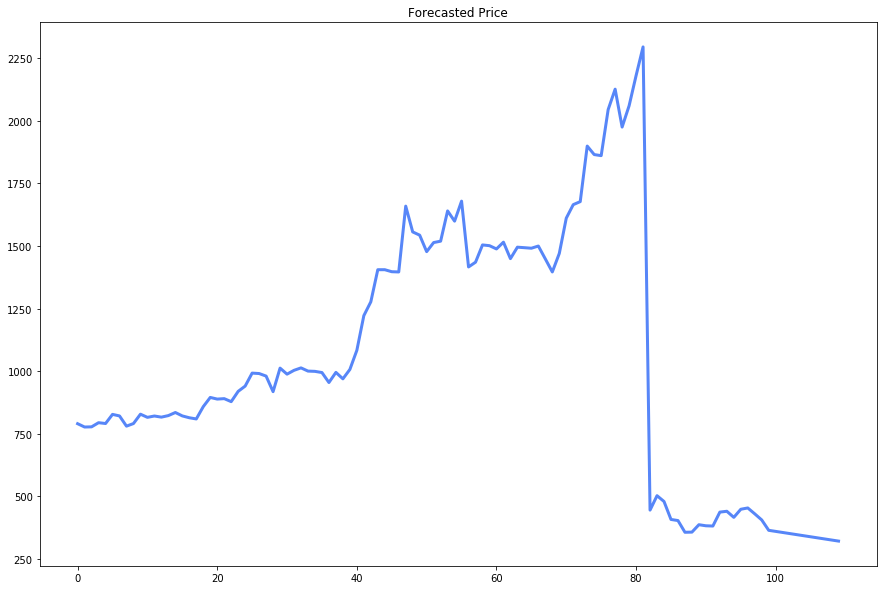

In [12]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = '#5786f8', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [13]:
# high
high = df[['2. high']]
high

,2. high
date,
2020-05-05,798.92
2020-05-06,789.80
2020-05-07,796.40
2020-05-08,824.00
2020-05-11,824.00
...,...
2020-09-18,451.00
2020-09-21,455.68
2020-09-22,437.76


[395.46545455]
[391.43090909]
[387.39636364]
[383.36181818]
[379.32727273]
[375.29272727]
[371.25818182]
[367.22363636]
[363.18909091]
[359.15454545]


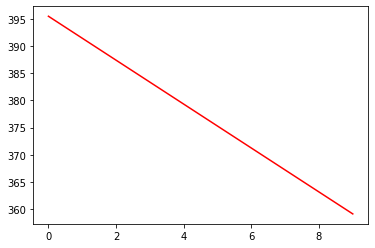

In [14]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print( (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=395.465455
predicted=391.430909
predicted=387.396364
predicted=383.361818
predicted=379.327273
predicted=375.292727
predicted=371.258182
predicted=367.223636
predicted=363.189091
predicted=359.154545


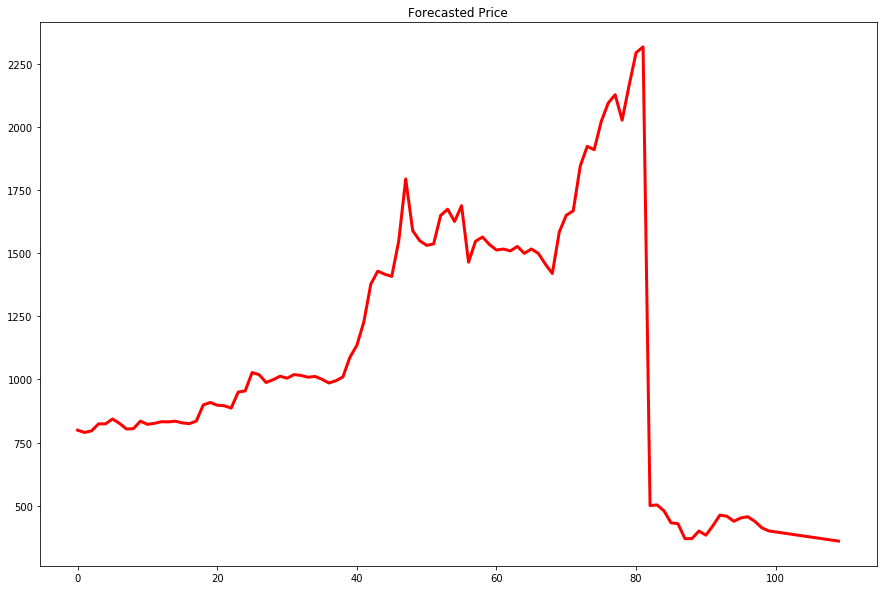

In [15]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'r', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [16]:
# low
low = df[['3. low']]
low

,3. low
date,
2020-05-05,762.1800
2020-05-06,761.1100
2020-05-07,772.3500
2020-05-08,787.0100
2020-05-11,785.0000
...,...
2020-09-18,428.8000
2020-09-21,407.0700
2020-09-22,417.6001


[347.14969697]
[342.99939394]
[338.84909091]
[334.69878788]
[330.54848485]
[326.39818182]
[322.24787879]
[318.09757576]
[313.94727273]
[309.7969697]


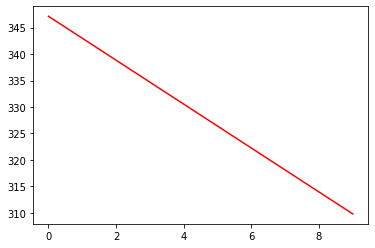

In [17]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print( (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=347.149697
predicted=342.999394
predicted=338.849091
predicted=334.698788
predicted=330.548485
predicted=326.398182
predicted=322.247879
predicted=318.097576
predicted=313.947273
predicted=309.796970


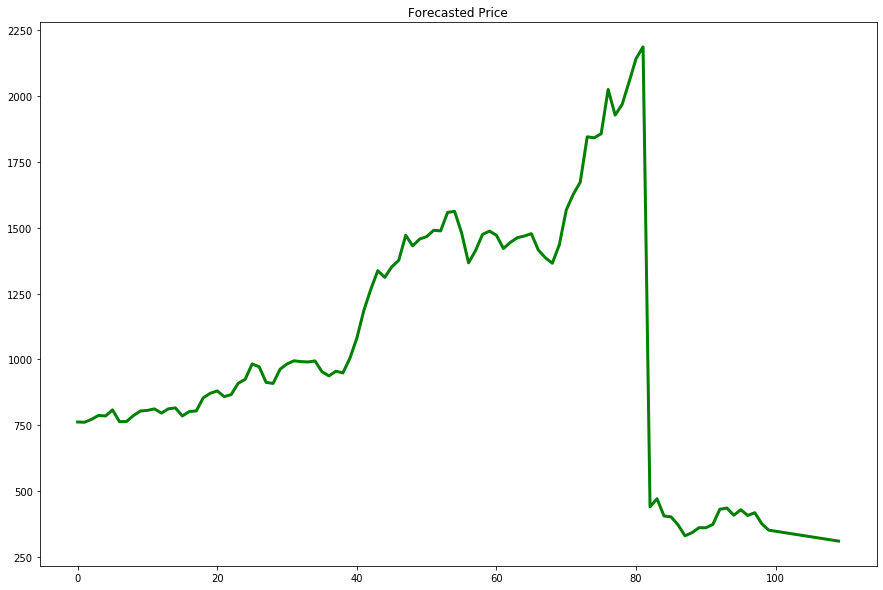

In [18]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'g', lw = 3)
plt.title('Forecasted Price')
plt.show()